In [123]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

### 1 Régression linéaire simple
L’objectif est d’entraîner un modèle de régression linéaire simple sur un problème synthétique. Ce problème comprend 100 instances d’une seule caractéristique dont les valeurs sont comprises entre 0 et 10. La variable cible est obtenue par :
$$y = 4x + 2 + u$$
où u est un bruit gaussien tel quel u ∼ N (0, 5).
1. Créez la matrice augmentée X, comme vu en cours

In [124]:
x = np.random.uniform (0, 10, 100)
X = np.column_stack((x, np.ones((x.shape[0], 1))))

2. Calculez le vecteur y à partir de X et de u

In [125]:
true_param = np.array ([[4],[2]])
noise = 5

# noise generation -------------------
N = np.random.normal (0, 5, (100,1))

# target calculation ----------------
y = np.dot(X, true_param) + N


3. Affichez le nuage de points résultant sur un graphique

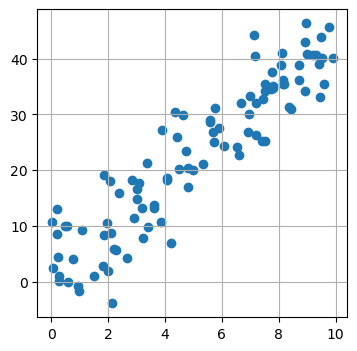

In [126]:
plt.figure(figsize=(4, 4))
plt.scatter(x, y, marker='o')
plt.grid(True)
plt.show()

4. Calculez les paramètres de régression linéaire sur ces données en utilisant la méthode des moindres carrés ordinaires

In [127]:
w = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
aw = w[0][0]
bw = w[-1][0]
print(w)

[[4.14106776]
 [1.71200596]]


5. Affichez le nuage de points et le modèle de régression linéaire sur un même graphique

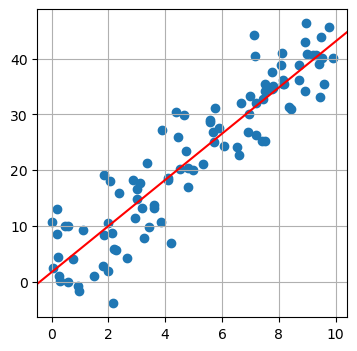

In [128]:
plt.figure(figsize=(4, 4))
plt.scatter(x, y, marker='o')
plt.axline((0, bw), slope=aw, color='red')
plt.grid(True)
plt.show()

6. Donnez votre analyse du résultat obtenu

3. Expliquez briévement pourquoi il est important de respecter les proportions de classe et pourquoi la séparation est aléatoire?

<div style="background-color:#f0f8ff; color:#333333; padding:15px; border-radius:8px; font-family:Arial, sans-serif; line-height:1.6;">
  <p>
    O metodo de regressao linear simples aparenta ter sido bem sucedido, pois a linha esta bem centralizada na nuvem de pontos e seguindo uma mesma inclinaçao. Isto pode ser melhor explicado pela pequena diferença entre os parametros reais definidos pelo problema (coeficiente 4 e intercessao em 2) e os parametros calculados em w. 
  </p>
  <p>
    Destaca-se aqui a necessidade de expandir a matrix X com uma nova coluna de valores 1 para que seja encontrado o ponto de interceçao durante o calculo matricial.
  </p>
</div>

### 2 Régression linéaire multiple
Cet exercice porte sur la régression linéaire multiple, c’est-à-dire pour des données décrites avec plusieurs caractéristiques. Pour cela, nous proposons d’utiliser le jeu de données prostate.csv disponible sur UniversiTICE. Ce jeu de données est présenté dans le livre ”Elements of Statistical Learning” de Hastie, Tibshirani et Friedman disponible en ligne au format PDF. Une description du problème est donnée à la page 49, section 3.2.1.

Le jeu de données comprend 8 caractéristiques, une variable cible appelée lpsa et une colonne train indiquant si les données appartiennent à l’ensemble d’apprentissage (T) ou de test (F).

1. Chargez les données :

In [150]:
path = "./prostate.csv"
df = pd.read_csv(path , header="infer", delimiter=";")
df = df.drop(["idx"], axis =1) #we drop the column "quality"
print("\n========= Dataset summary ========= \n")
df.describe()


========= Dataset summary ========= 



,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
count,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,97.000000
mean,3.433679e-17,7.084825e-16,4.292099e-16,-1.384917e-16,4.807151e-17,5.493887e-17,2.060208e-17,1.630998e-17,2.478387
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.154329
min,-2.288330e+00,-2.927180e+00,-3.071272e+00,-1.024706e+00,-5.229409e-01,-8.631712e-01,-1.042157e+00,-8.644665e-01,-0.430783
25%,-7.103074e-01,-5.907003e-01,-5.192637e-01,-1.024706e+00,-5.229409e-01,-8.631712e-01,-1.042157e+00,-8.644665e-01,1.731656
50%,8.222243e-02,-1.385505e-02,1.523174e-01,1.376813e-01,-5.229409e-01,-4.427980e-01,3.426271e-01,-3.326277e-01,2.591516
75%,6.592691e-01,5.776070e-01,5.552660e-01,1.004813e+00,-5.229409e-01,9.712290e-01,3.426271e-01,5.537703e-01,3.056357
max,2.096506e+00,2.687699e+00,2.032744e+00,1.534282e+00,1.892548e+00,2.205279e+00,3.112196e+00,2.681126e+00,5.582932


2. Créez deux sous-ensembles de données, pour l’apprentissage et pour le test :

In [151]:
X_train = df[df.train=="T"].drop(["train", "lpsa"], axis =1)
y_train = df[df.train=="T"]["lpsa"]
X_test = df[df.train!="T"].drop(["train", "lpsa"], axis =1)
y_test = df[df.train!="T"]["lpsa"]


print(f"Trainset: n = {X_train.shape [0]} inst., d = {X_train.shape [1]} feat.")
...
print(f"Testset: m = {X_test.shape [0]} inst., d = {X_test.shape [1]} feat.")

Trainset: n = 67 inst., d = 8 feat.
Testset: m = 30 inst., d = 8 feat.


3. Calculez les paramètres du modèle de régression linéaire sur les données d’apprentissage

In [152]:
Xa = np.concatenate((X_train, np.ones((X_train.shape[0], 1))), axis=1)
w = np.dot(np.linalg.inv(np.dot(Xa.T, Xa)), np.dot(Xa.T, y_train))
print("w = ", w[:-1])
print("b = ", w[-1])

w =  [ 0.67952814  0.26305307 -0.14146483  0.21014656  0.3052006  -0.28849277
 -0.02130504  0.26695576]
b =  2.4649329221237455


4. Quelles valeurs obtenez-vous pour w et pour b ? Vous pouvez comparer ces valeurs à celles du tableau 3.2 de la page 50 du livre (colonne Coefficient).

In [159]:
w_livre = [0.680, 0.263, -0.141, 0.210, 0.305, -0.288, -0.021, 0.267, 2.465]

print([round(x, 3) for x in w])
print(w_livre)

[0.68, 0.263, -0.141, 0.21, 0.305, -0.288, -0.021, 0.267, 2.465]
[0.68, 0.263, -0.141, 0.21, 0.305, -0.288, -0.021, 0.267, 2.465]


<div style="background-color:#f0f8ff; color:#333333; padding:15px; border-radius:8px; font-family:Arial, sans-serif; line-height:1.6;">
  <p>
    O metodo aplicado aqui para a regreçao linar multipla foi capaz de encontrar os mesmos valores de coeficientes que vistos no livro. Isso indica que foi realizada a correta aplicaçao do metodo e também que (como foram usados os mesmos datasets para treino) a resolucao deste exercicio nao utiliza ruidos gerados aleatoriamente que possam impactar o resultado do treinamento.
  </p>
</div>

5. Utilisez le modèle résultant pour prédire les valeurs de y pour les données de test

In [154]:
X_test_one = np.column_stack((X_test, np.ones((X_test.shape[0], 1))))
y_pred = np.dot(X_test_one, w)
print(y_pred)

[1.96903844 1.16995577 1.26117929 1.88375914 2.54431886 1.93275402
 2.04233571 1.83091625 1.99115929 1.32347076 2.93843111 2.20314404
 2.166421   2.79456237 2.67466879 2.18057291 2.40211068 3.02351576
 3.21122283 1.38441459 3.41751878 3.70741749 2.54118337 2.72969658
 2.64055575 3.48060024 3.17136269 3.2923494  3.11889686 3.76383999]


6. Calculez l’erreur quadratique moyenne (MSE) sur les données de test, ainsi que l’écart-type correspondant

In [158]:
MSE = np.mean((y_test-y_pred)**2)
print(f"MSE = {MSE:.3f}")

std = np.std(y_test-y_pred)
print(f"Écart-type: {std:.3f}")

MSE = 0.521
Écart-type: 0.721


7. Quelles valeurs obtenez-vous ? Vous pouvez comparer ces valeurs à celles du tableau 3.3 de la page 63 du livre (Test Error et Std Error de la colonne LS).

<div style="background-color:#f0f8ff; color:#333333; padding:15px; border-radius:8px; font-family:Arial, sans-serif; line-height:1.6;">
  <p>
    Foi encontrado o valor indicado para o MSE, mas houve uma pequena diferença no standard deviation
  </p>
</div>



### 3 Régression polynomiale
Nous proposons dans cet exercice de tester la régression polynomiale sur un problème synthétique.

1. Générez les données tel que :

$$y = a7x7 + a6x6 + a5x5 + a4x4 + a3x3 + a2x2 + a1x + a0 + u$$

où
- x est l’unique caractéristique des instances, dont les valeurs sont générées aléatoirement entre −5 et 5
- les coefficients ai sont générés aléatoirement entre −2 et 2
- u ∼ N (0, 2000)

In [162]:
def GenerezDonnees(n):
    # data generation -------------------
    X = np.random.uniform (-5, 5, n)
    # noise generation -------------------
    N = np.random.normal (0, 2000, n)
    # build the polynomial -------------------
    a = np.random.uniform(-2, 2, 8)
    f = np.poly1d(a)
    Y = f(X) + N
    # data normalization -------------------
    X_norm = (X - X.mean(axis =0)) / X.std(axis=0)
    Y_norm = (Y - Y.mean(axis =0)) / Y.std(axis=0)
    
    return X_norm, Y_norm

X_norm, Y_norm = GenerezDonnees(100)

2. Affichez le nuage de points résultant sur un graphique

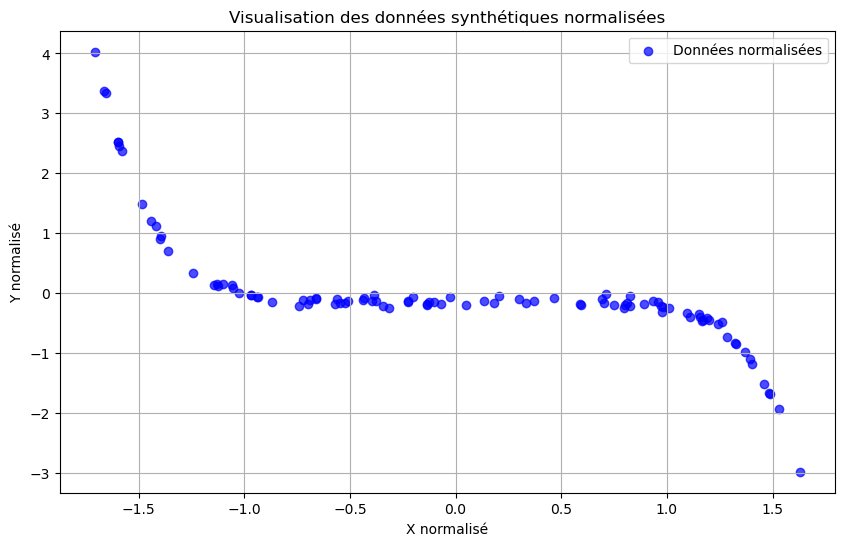

In [163]:
# data visualization -------------------
plt.figure(figsize=(10, 6))
plt.scatter(X_norm, Y_norm, label="Données normalisées", color="blue", alpha=0.7)
plt.title("Visualisation des données synthétiques normalisées")
plt.xlabel("X normalisé")
plt.ylabel("Y normalisé")
plt.legend()
plt.grid(True)
plt.show()

3. En utilisant la méthode polyfit de Numpy, calculez les paramètres du modèle de régression
polynomiale de degré 1

In [164]:
def CalculParam(X_norm, Y_norm, d):

    # Régression polynomiale de degré 1
    w = np.polyfit(X_norm, Y_norm, deg=d)  # Ajustement du modèle de degré 1
    h = np.poly1d(w)  # Fonction ajustée

    # Calcul des valeurs prédites
    Y_hat = h(X_norm)
    
    return Y_hat, h

Y_hat, h = CalculParam(X_norm, Y_norm, 1)

4. Affichez le nuage de points et le modèle de régression polynomiale sur un même graphique


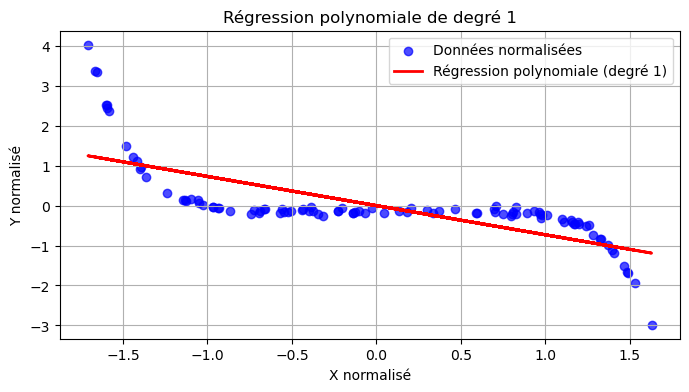

In [165]:
# Visualisation des données et du modèle ajusté
plt.figure(figsize=(8, 4))
plt.scatter(X_norm, Y_norm, label="Données normalisées", color="blue", alpha=0.7)
plt.plot(X_norm, Y_hat, label="Régression polynomiale (degré 1)", color="red", linewidth=2)
plt.title("Régression polynomiale de degré 1")
plt.xlabel("X normalisé")
plt.ylabel("Y normalisé")
plt.legend()
plt.grid(True)
plt.show()

5. Faites de même pour des modèles de degré 7 et 25

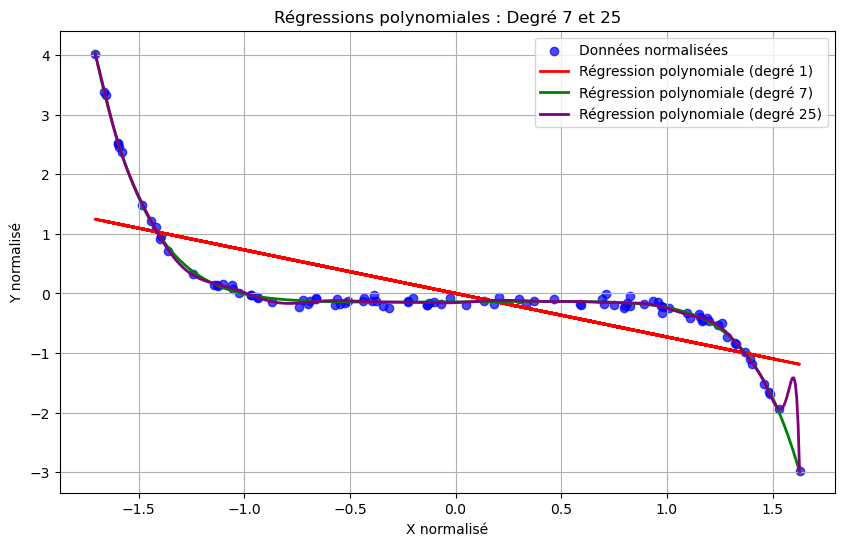

In [166]:
# Régression polynomiale de degré 7
Y_hat_7, h_7 = CalculParam(X_norm, Y_norm, 7)

# Régression polynomiale de degré 25
Y_hat_25, h_25 = CalculParam(X_norm, Y_norm, 25)


# Visualisation des résultats
plt.figure(figsize=(10, 6))
plt.scatter(X_norm, Y_norm, label="Données normalisées", color="blue", alpha=0.7)

# Ajout des courbes ajustées
X_plot = np.linspace(X_norm.min(), X_norm.max(), 500)  # Points pour une courbe lisse
plt.plot(X_norm, Y_hat, label="Régression polynomiale (degré 1)", color="red", linewidth=2)
plt.plot(X_plot, h_7(X_plot), label="Régression polynomiale (degré 7)", color="green", linewidth=2)
plt.plot(X_plot, h_25(X_plot), label="Régression polynomiale (degré 25)", color="purple", linewidth=2)

plt.title("Régressions polynomiales : Degré 7 et 25")
plt.xlabel("X normalisé")
plt.ylabel("Y normalisé")
plt.legend()
plt.grid(True)
plt.show()

6. Reproduisez le test plusieurs fois, avec plusieurs générations aléatoires différentes et donnez  votre analyse des résultats obtenus

In [171]:
def polynomial(n):
    
    X_norm, Y_norm = GenerezDonnees(n)

    # Régression polynomiale de degré 1, 7 et 25
    Y_hat, h = CalculParam(X_norm, Y_norm, 1)
    Y_hat_7, h_7 = CalculParam(X_norm, Y_norm, 7)
    Y_hat_25, h_25 = CalculParam(X_norm, Y_norm, 25)
    
    # Visualisation des résultats
    plt.figure(figsize=(8, 3))
    plt.scatter(X_norm, Y_norm, label="Données normalisées", color="blue", alpha=0.7)

    # Ajout des courbes ajustées
    X_plot = np.linspace(X_norm.min(), X_norm.max(), 500)  # Points pour une courbe lisse
    plt.plot(X_norm, Y_hat, label="Régression polynomiale (degré 1)", color="red", linewidth=2)
    plt.plot(X_plot, h_7(X_plot), label="Régression polynomiale (degré 7)", color="green", linewidth=2)
    plt.plot(X_plot, h_25(X_plot), label="Régression polynomiale (degré 25)", color="purple", linewidth=2)

    plt.title("Régressions polynomiales : Degré 7 et 25")
    plt.xlabel("X normalisé")
    plt.ylabel("Y normalisé")
    plt.legend()
    plt.grid(True)
    plt.show()
    


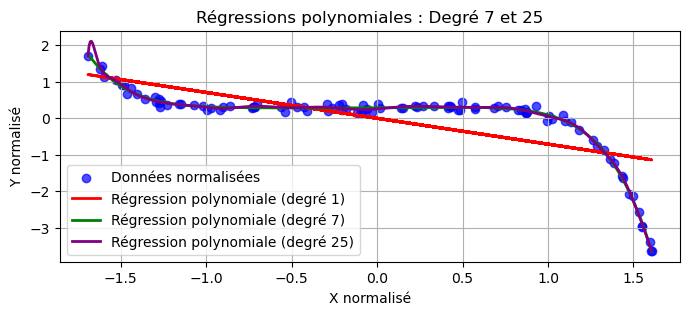

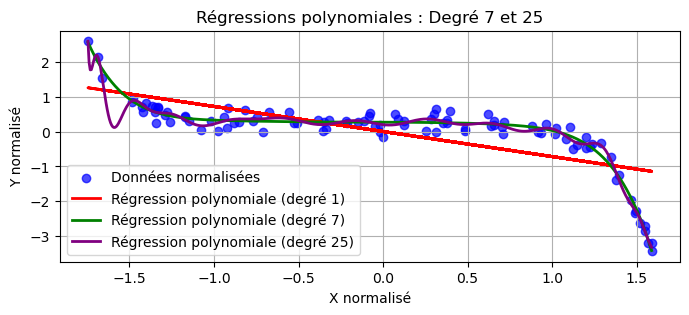

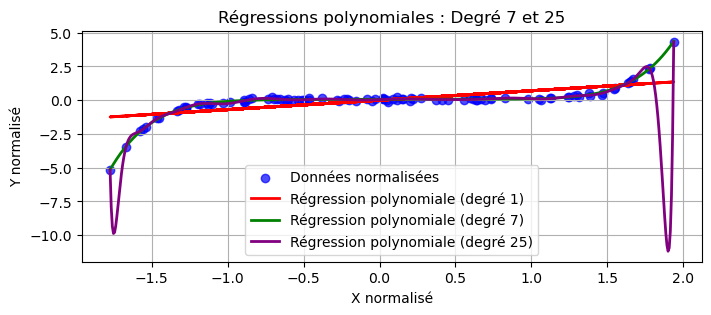

In [172]:
for i in range(3):
    polynomial(100)

<div style="background-color:#f0f8ff; color:#333333; padding:15px; border-radius:8px; font-family:Arial, sans-serif; line-height:1.6;">
  <p>
    Podemos observar que a regressao de d=1 nao é suficiente para representar bem as distribuiçoes. O polinomio apresentou a melhor adequaçao às funcoes. O polinomio de d=25 parece apresentar sinais de overfiting, pois acompanha as tendencias do ruido dos dados.
  </p>
</div>



7. Calculez l’erreur quadratique moyenne pour chaque modèle et comparez les résultats obtenus

In [144]:
MSE = np.mean((Y_norm-Y_hat)**2)
print(f"MSE d=1 : {MSE:.4f}")

MSE = np.mean((Y_norm-Y_hat_7)**2)
print(f"MSE d=7 : {MSE:.4f}")

MSE = np.mean((Y_norm-Y_hat_25)**2)
print(f"MSE d=25: {MSE:.4f}")

MSE d=1 : 0.4799
MSE d=7 : 0.0063
MSE d=25: 0.0050


<div style="background-color:#f0f8ff; color:#333333; padding:15px; border-radius:8px; font-family:Arial, sans-serif; line-height:1.6;">
  <p>
    Os resultados de MSE obtidos estao parcialmente de acordo com o que foi dito anteriormente, pois d=1 realmente apresenta um resultado claramente insatisfatorio, porem nao é possivel perceber o overfitting atraves do valor de MSE. Isso pode indicar que é interessante utilizar diferentes metricas para avaliar o desempenho dos modelos.
  </p>
</div>

In [191]:
def calcR2(Y_norm, Y_hat):
    # Cálculo de SS_res (soma dos quadrados dos resíduos)
    SS_res = np.sum((Y_norm - Y_hat) ** 2)

    # Cálculo de SS_tot (soma dos quadrados totais)
    Y_mean = np.mean(Y_norm)
    SS_tot = np.sum((Y_norm - Y_mean) ** 2)

    # Cálculo do R^2
    R2 = 1 - (SS_res / SS_tot)

    print(f"R²: {R2:.4f}")
    
calcR2(Y_norm, Y_hat)
calcR2(Y_norm, Y_hat_7)
calcR2(Y_norm, Y_hat_25)

R²: 0.5145
R²: 0.9931
R²: 0.9959
